# Table of Contents <a id='top'></a> 
                                                          

1. [Import Packages](#imports)<br>
2. [Define Functions](#functions)<br> 
3. [Conduct Experiments](#experiments)<br> 

---
## 1: Import Packages <a id='imports'></a> 
[jump to top](#top)<br>

In [40]:
# modules I created
from bidder import Bidder
from auction import Auction, User

# outside libraries
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

--- 
## 2: Define Functions <a id='functions'></a> 
[jump to top](#top)<br>

In [2]:
def run_experiment(auction):
    for i in range(auction.bidders[0].num_rounds):
        auction.execute_round()

In [3]:
def overview(auction, game_state_id = None):
    """Given a completed auction (an auction object for which .execute() has been repeatedly called),
    summarize the attributes of the bidders involved and indicate the final balance of each bidder"""
    
    dicty = {"auction_id": [],
             "bidder_id": [],
             "bidder_type": [],
             "alpha": [],
             "aggressiveness": [],
             "under_cut": [],
             "num_users": [],
             "final_balance": []}

    for bidder in auction.bidders:
        dicty["auction_id"].append(auction.auction_id)
        dicty["bidder_id"].append(bidder.bidder_id)
        dicty["bidder_type"].append(bidder.bidder_type)
        if bidder.bidder_type == "smart":
            dicty["alpha"].append(bidder.alpha)
            dicty["aggressiveness"].append(bidder.aggressiveness)
            dicty["under_cut"].append(bidder.under_cut)
        else:
            dicty["alpha"].append("NA")
            dicty["aggressiveness"].append("NA")
            dicty["under_cut"].append("NA")
        dicty["num_users"].append(len(auction.users))
        dicty["final_balance"].append(auction.balances[bidder])

    summary_df = pd.DataFrame(dicty)
    
    if game_state_id != None:
        summary_df["game_state_id"] = [game_state_id for i in range(len(summary_df))]
        return summary_df[["auction_id"] + ["game_state_id"] + ["bidder_id", "bidder_type", "alpha", "aggressiveness", "under_cut", "num_users", "final_balance"]]
    else:
        return summary_df


--- 
## 3: Conduct Experiments <a id='experiments'></a> 
[jump to top](#top)<br>

### Sample Experiment

In [4]:
users = [User() for i in range(10)]
bidders = [Bidder(num_users=10, num_rounds=1000, bidder_type="zero"),
          Bidder(num_users=10, num_rounds=1000, bidder_type="smart", alpha=0.1, aggressiveness=0.85, under_cut=0),
          Bidder(num_users=10, num_rounds=1000, bidder_type="smart", alpha=0.2, aggressiveness=0.85, under_cut=0),
          Bidder(num_users=10, num_rounds=1000, bidder_type="random")]

auction = Auction(users, bidders, 127)

run_experiment(auction)

In [5]:
overview(auction, game_state_id=33)

,auction_id,game_state_id,bidder_id,bidder_type,alpha,aggressiveness,under_cut,num_users,final_balance
0,127,33,None,zero,NA,NA,NA,10,0.000000
1,127,33,None,smart,0.1,0.85,0,10,-14.258282
2,127,33,None,smart,0.2,0.85,0,10,-19.475409
3,127,33,None,random,NA,NA,NA,10,-9.670785


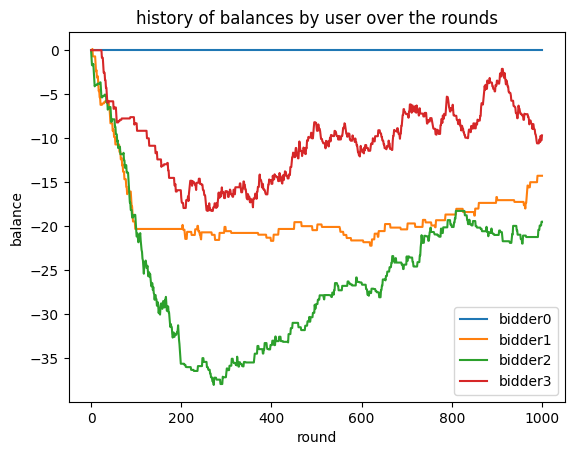

In [6]:
auction.plot_history()

In [7]:
alpha_levels = [i/10 for i in range(10)]
aggressiveness_levels = [i/20 for i in range(20)]
under_cut_levels = [i/20 for i in range(0, 5)]

In [13]:
dict_bidders = {"bidder_id":[], "alpha": [], "aggressiveness": [], "under_cut": []}

i = 0
for alpha in alpha_levels:
    for agg in aggressiveness_levels:
        for undercut in under_cut_levels:
            dict_bidders["bidder_id"].append(i)
            dict_bidders["alpha"].append(alpha)
            dict_bidders["aggressiveness"].append(agg)
            dict_bidders["under_cut"].append(undercut)
            i += 1
            
df_bidders = pd.DataFrame(dict_bidders)  
df_bidders["num_auctions_played"] = [0 for i in range(len(df_bidders))]
df_bidders["total_balance"] = [0 for i in range(len(df_bidders))]
df_bidders["average_final_balance"] = df_bidders["total_balance"] / df_bidders["num_auctions_played"]
df_bidders

,bidder_id,alpha,aggressiveness,under_cut,num_auctions_played,total_balance,average_final_balance
0,0,0.0,0.00,0.00,0,0,NaN
1,1,0.0,0.00,0.05,0,0,NaN
2,2,0.0,0.00,0.10,0,0,NaN
3,3,0.0,0.00,0.15,0,0,NaN
4,4,0.0,0.00,0.20,0,0,NaN
...,...,...,...,...,...,...,...
995,995,0.9,0.95,0.00,0,0,NaN
996,996,0.9,0.95,0.05,0,0,NaN
997,997,0.9,0.95,0.10,0,0,NaN
998,998,0.9,0.95,0.15,0,0,NaN


**So I want to track the performance of each of these bidders across different combinations of other bidders as well as num_users**

My idea right now is to randomly draw a random number of bidders from that data frame ^ and run an auction with them. Then I will repeat this over and over again until each bidder has been selected like 10 times (?). 

In [9]:
users = [User() for i in range(10)]
num_bidders = np.random.randint(5, 10)
bidders_ids = np.random.choice(df_bidders.index, num_bidders)

bidders = [Bidder(num_users=10, num_rounds=1000, bidder_type="zero")] + [Bidder(10, 1000, bidder_id = bidders_ids[i], bidder_type="smart", alpha=df_bidders.loc[bidders_ids[i]][1], aggressiveness=df_bidders.loc[bidders_ids[i]][2], under_cut=df_bidders.loc[bidders_ids[i]][3]) for i in range(num_bidders)] + [Bidder(num_users=10, num_rounds=1000, bidder_type="random")]

auction = Auction(users, bidders, 127)

run_experiment(auction)

/var/folders/g0/jkkb6mt952x_b5r2tsn_7jz80000gn/T/ipykernel_3897/47776371.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bidders = [Bidder(num_users=10, num_rounds=1000, bidder_type="zero")] + [Bidder(10, 1000, bidder_id = bidders_ids[i], bidder_type="smart", alpha=df_bidders.loc[bidders_ids[i]][1], aggressiveness=df_bidders.loc[bidders_ids[i]][2], under_cut=df_bidders.loc[bidders_ids[i]][3]) for i in range(num_bidders)] + [Bidder(num_users=10, num_rounds=1000, bidder_type="random")]


In [12]:
overview_df = overview(auction, game_state_id=33)
overview_df

,auction_id,game_state_id,bidder_id,bidder_type,alpha,aggressiveness,under_cut,num_users,final_balance
0,127,33,NaN,zero,NA,NA,NA,10,0.000000
1,127,33,561.0,smart,0.5,0.6,0.05,10,0.000000
2,127,33,692.0,smart,0.6,0.9,0.1,10,34.413221
3,127,33,407.0,smart,0.4,0.05,0.1,10,0.000000
4,127,33,624.0,smart,0.6,0.2,0.2,10,0.000000
5,127,33,756.0,smart,0.7,0.55,0.05,10,0.000000
6,127,33,340.0,smart,0.3,0.4,0.0,10,0.000000
7,127,33,865.0,smart,0.8,0.65,0.0,10,5.441101
8,127,33,571.0,smart,0.5,0.7,0.05,10,0.000000
9,127,33,146.0,smart,0.1,0.45,0.05,10,0.000000


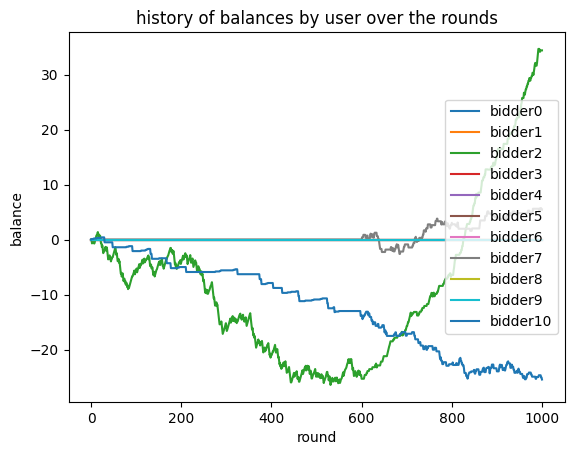

In [11]:
auction.plot_history()

In [78]:
def run_record_auction():
    """Do it all"""
    
    # instantiate 10 users
    users = [User() for i in range(10)]
    
    # decide how many smart bidders will participate, it will be anywhere from 5 to 9
    num_bidders = np.random.randint(5, 10)

    # randomly select bidders from the table df_bidders 
    bidders_ids = np.random.choice(df_bidders.index, num_bidders)
    
    # instantiate the bidders with the attributes defined in the df_bidders table
    bidders = [Bidder(num_users=10, num_rounds=1000, bidder_type="zero")] + [Bidder(10, 1000, bidder_id = bidders_ids[i], bidder_type="smart", alpha=df_bidders.loc[bidders_ids[i]][1], aggressiveness=df_bidders.loc[bidders_ids[i]][2], under_cut=df_bidders.loc[bidders_ids[i]][3]) for i in range(num_bidders)] + [Bidder(num_users=10, num_rounds=1000, bidder_type="random")]
    
    # instantiate the auction with the users and bidders created above
    auction = Auction(users, bidders, 127)
    
    # execute 1000 rounds of the auction
    run_experiment(auction)
    
    # record the results of the auction in the df_bidders dataframe
    smart_bidders_df = overview_df[overview_df["bidder_type"]=="smart"]
    smart_bidders_df = smart_bidders_df.reset_index()
    for i in range(len(smart_bidders_df)):
        final_balance = smart_bidders_df.loc[i, "final_balance"]
        bidder_id = smart_bidders_df.loc[i, "bidder_id"]
        df_bidders.loc[bidder_id, "total_balance"] += final_balance
        df_bidders.loc[bidder_id, "num_auctions_played"] += 1

I don't think it's working yet

In [ ]:
import time

a = time.time()

for i in range(1000):
    run_experiment(auction)

b = time.time()

In [ ]:
print(round(b-a, 2), "seconds")